In [ ]:
!pip install pmdarima

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

from pandas import read_csv
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from pmdarima.arima import ADFTest

from sklearn.metrics import mean_squared_error

In [ ]:
meter = read_csv("2021-all-meter.csv")
meter = meter.loc[:, ~meter.columns.str.contains('^Unnamed')]
meter["start"] = pd.to_datetime(meter["AMI Meter ID"])
meter["end"] = pd.to_datetime(meter["date"])
meter = meter.drop(["AMI Meter ID","date"],axis = 1)
meter

,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,66676872,66735042,...,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total,start,end
0,104.192,28.649,46.68,13.104,9.195,373.44,19.656,5.491,13.10,12.768,...,15.228,16.212,47.430,51.60,16.35,21.624,67808.216,71482.267,2021-03-21 00:00:00,2021-03-21 00:30:00
1,104.848,28.578,51.60,15.728,9.810,373.44,20.640,6.278,14.74,13.260,...,14.736,15.228,39.198,46.68,16.35,17.688,67808.216,71395.502,2021-03-21 00:30:00,2021-03-21 01:00:00
2,106.160,29.929,55.29,14.416,8.580,375.96,19.656,7.853,13.92,12.768,...,15.228,14.244,40.976,44.22,14.30,18.180,68586.253,72266.724,2021-03-21 01:00:00,2021-03-21 01:30:00
3,104.192,29.488,50.37,16.384,11.040,378.36,18.672,6.278,15.56,15.720,...,14.736,14.244,42.165,44.22,16.35,16.704,68586.253,72069.140,2021-03-21 01:30:00,2021-03-21 02:00:00
4,104.192,28.645,52.83,15.728,12.270,375.96,20.640,4.704,13.92,16.212,...,15.228,16.212,50.782,46.68,18.40,18.180,71152.560,74632.641,2021-03-21 02:00:00,2021-03-21 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,104.192,22.003,11.04,14.416,13.422,766.68,24.084,3.917,18.84,14.736,...,42.264,26.040,28.374,88.44,18.40,22.116,72763.262,76780.806,2021-09-27 21:30:00,2021-09-27 22:00:00
8396,104.192,22.214,9.81,11.136,12.476,727.44,22.608,3.917,20.48,14.736,...,40.296,22.608,29.898,88.44,16.35,20.148,61979.926,65924.937,2021-09-27 22:00:00,2021-09-27 22:30:00
8397,104.192,22.598,11.04,10.480,10.888,604.56,23.592,3.130,19.66,11.796,...,38.820,21.132,27.843,85.98,16.35,20.148,61979.926,65741.525,2021-09-27 22:30:00,2021-09-27 23:00:00
8398,104.192,22.598,9.81,7.856,9.106,668.40,20.148,3.130,17.20,12.288,...,35.880,15.720,24.676,85.98,14.30,19.656,51223.651,54984.815,2021-09-27 23:00:00,2021-09-27 23:30:00


In [ ]:
steps = pd.DataFrame(pd.date_range('2021-03-22', '2021-09-28', freq = '1d')).count()
dates = pd.DataFrame(pd.date_range('2021-03-22', '2021-09-28', freq = '30T')).count()
date = pd.DataFrame(pd.date_range('2021-03-22 00:00:00', '2021-09-28 23:30:00', freq = '30T')).count()
predictin = pd.DataFrame()
predictin["start","end"] = [pd.date_range('2021-03-22 00:00:00', '2021-09-28 23:30:00', freq = '30T'),pd.date_range('2021-03-22 00:30:00', '2021-09-29 00:00:00', freq = '30T')]
count = 48*191
display(predictin)


,"(start, end)"
0,"DatetimeIndex(['2021-03-22 00:00:00', '2021-03..."
1,"DatetimeIndex(['2021-03-22 00:30:00', '2021-03..."


In [ ]:
def getModel(e):
  data = e.copy()
  arima_model = auto_arima(data, start_p=0, start_q=0,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=5, max_q=5, # maximum p and q
                        m=1,              # frequency of series 2* 24 for 30 minutes
                        d=0,           # let model determine 'd'
                        seasonal=False,   # No Seasonality
                        start_P=0,
                        D=0,
                        #trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)
  arima_model.fit(data)
  return arima_model.predict(n_periods = 480),arima_model.order

In [ ]:
def fitModel(f,g):
  data = f.copy()
  return g.fit(data)

In [ ]:
frame = meter.copy()
column = "98923663"
data = frame.copy()

dates = pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T')
merge = pd.DataFrame(dates,columns=["dates"]).merge(data,how = "left", left_on = "dates", right_on = "start")

end_data = 48 + 480

dictMeterName =  {"meter_name":[column]}
dataFrameMeterName = pd.DataFrame(dictMeterName)

steps = pd.DataFrame(pd.date_range('2021-03-22', '2021-09-27', freq = '1d')).count()
print (steps)
dates = pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T')
data = pd.DataFrame(dates,columns=["dates"]).merge(data,how = "left", left_on = "dates", right_on = "start")

predictin = pd.DataFrame()
predictin["start"] = pd.date_range('2021-04-01 00:00:00', '2021-10-07 23:30:00', freq = '30T')
predictin["end"] = pd.date_range('2021-04-01 00:30:00', '2021-10-08 00:00:00', freq = '30T')

allPred = pd.DataFrame(columns=["prediction","p","d","q"])

for count in range(19):
  p,o = getModel(data[column][0:end_data])
  #print(o[0],o[1],o[2],"order: ", o)

  ord =  {"p":[o[0]],
           "d":[o[1]],
           "q":[o[2]]
  }
  order = pd.DataFrame(ord)
  prediction = pd.DataFrame()
  #order["p"] = o[0]
  #order["d"] = o[1]
  #order["q"] = o[2]

  prediction["prediction"] = p
  preOrd = prediction.merge(order,how="cross")

  allPred = allPred.append(preOrd, ignore_index = True)

  display(allPred)
  end_data += 48

dataFrameFinalPrediction = predictin.copy()
dataFrameFinalPrediction["prediction"] = allPred["prediction"]
dataFrameFinalPrediction["p"] = allPred["p"]
dataFrameFinalPrediction["d"] = allPred["d"]
dataFrameFinalPrediction["q"] = allPred["q"]

dataFrameFinalPrediction = dataFrameFinalPrediction.merge(dataFrameMeterName,how="cross")
display(dataFrameFinalPrediction)

0    190
dtype: int64


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
475,19.616559,2,0,2
476,19.616559,2,0,2
477,19.616559,2,0,2
478,19.616559,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
955,20.862176,4,0,1
956,20.862176,4,0,1
957,20.862176,4,0,1
958,20.862176,4,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
1435,21.529918,4,0,1
1436,21.529918,4,0,1
1437,21.529918,4,0,1
1438,21.529918,4,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
1915,21.488614,2,0,2
1916,21.488614,2,0,2
1917,21.488614,2,0,2
1918,21.488614,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
2395,11.694711,3,0,3
2396,11.686908,3,0,3
2397,11.679260,3,0,3
2398,11.671758,3,0,3


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
2875,21.791200,2,0,2
2876,21.791200,2,0,2
2877,21.791200,2,0,2
2878,21.791200,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
3355,22.339655,2,0,2
3356,22.339655,2,0,2
3357,22.339655,2,0,2
3358,22.339655,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
3835,22.822480,2,0,2
3836,22.822480,2,0,2
3837,22.822480,2,0,2
3838,22.822480,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
4315,23.176218,5,0,5
4316,23.176570,5,0,5
4317,23.176223,5,0,5
4318,23.176565,5,0,5


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
4795,22.768042,5,0,3
4796,22.768042,5,0,3
4797,22.768042,5,0,3
4798,22.768042,5,0,3


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
5275,22.557231,2,0,2
5276,22.557231,2,0,2
5277,22.557231,2,0,2
5278,22.557231,2,0,2


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
5755,0.004889,4,0,3
5756,0.004803,4,0,3
5757,0.004714,4,0,3
5758,0.004624,4,0,3


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
6235,22.574901,5,0,1
6236,22.574901,5,0,1
6237,22.574901,5,0,1
6238,22.574901,5,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
6715,23.199938,5,0,5
6716,23.199934,5,0,5
6717,23.199938,5,0,5
6718,23.199934,5,0,5


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
7195,23.327771,5,0,1
7196,23.327771,5,0,1
7197,23.327771,5,0,1
7198,23.327771,5,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
7675,23.572551,5,0,1
7676,23.572551,5,0,1
7677,23.572551,5,0,1
7678,23.572551,5,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
8155,23.873263,5,0,1
8156,23.873263,5,0,1
8157,23.873263,5,0,1
8158,23.873263,5,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
8635,23.582070,5,0,1
8636,23.582070,5,0,1
8637,23.582070,5,0,1
8638,23.582070,5,0,1


<ipython-input-45-c5269cb0cba1>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allPred = allPred.append(preOrd, ignore_index = True)


,prediction,p,d,q
0,17.561325,2,0,2
1,17.260125,2,0,2
2,17.037535,2,0,2
3,16.886084,2,0,2
4,16.798231,2,0,2
...,...,...,...,...
9115,23.315872,5,0,1
9116,23.315872,5,0,1
9117,23.315872,5,0,1
9118,23.315872,5,0,1


,start,end,prediction,p,d,q,meter_name
0,2021-04-01 00:00:00,2021-04-01 00:30:00,17.561325,2,0,2,98923663
1,2021-04-01 00:30:00,2021-04-01 01:00:00,17.260125,2,0,2,98923663
2,2021-04-01 01:00:00,2021-04-01 01:30:00,17.037535,2,0,2,98923663
3,2021-04-01 01:30:00,2021-04-01 02:00:00,16.886084,2,0,2,98923663
4,2021-04-01 02:00:00,2021-04-01 02:30:00,16.798231,2,0,2,98923663
...,...,...,...,...,...,...,...
9115,2021-10-07 21:30:00,2021-10-07 22:00:00,23.315872,5,0,1,98923663
9116,2021-10-07 22:00:00,2021-10-07 22:30:00,23.315872,5,0,1,98923663
9117,2021-10-07 22:30:00,2021-10-07 23:00:00,23.315872,5,0,1,98923663
9118,2021-10-07 23:00:00,2021-10-07 23:30:00,23.315872,5,0,1,98923663


<Axes: xlabel='start'>

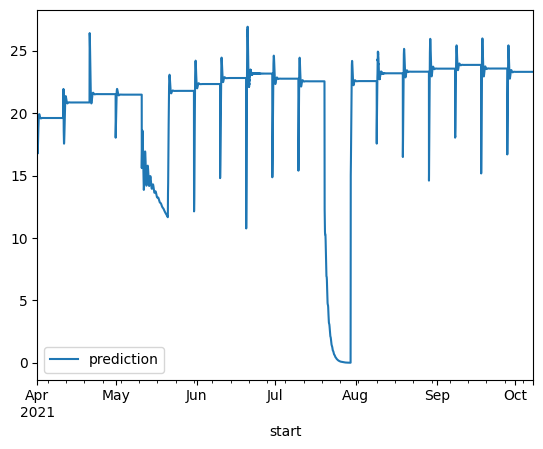

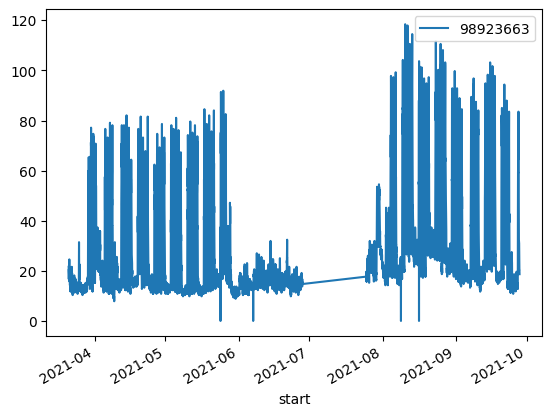

In [ ]:
dataFrameFinalPrediction.plot(kind="line",y="prediction",x="start")
#sns.histplot(data= meter,x= "98923663",
#             color='darkblue', edgecolor='black',
#             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 4})
meter.plot(kind="line",y="98923663", x="start")
#sns.histplot(data= dataFrameFinalPrediction,x= "prediction",
#             color='darkblue', edgecolor='black',
#             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 4})

In [ ]:
def createAllPredictions(d):
  data = d.copy()
  #split the data based on the missing time
  dates = pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T')
  merge = pd.DataFrame(dates,columns=["dates"]).data(meter,how = "left", left_on = "dates", right_on = "start")

  return predictionForMeter(merge)






In [ ]:
def addPredictions(h,i):
  data = h.copy()
  end_data = 383

  predictions = pd.DataFrame(columns=["prediction","p","d","q"])
  display(predictions)
  for count in range():
    getModel(data[0:end_data])

    predictions.append()
    end_data +=  48
  return predictions
addPredictions(meter,0)

,prediction,p,d,q


TypeError: ignored

In [ ]:
def predictionForMeter(dataframe):
  data = dataframe.copy()

  steps = pd.DataFrame(pd.date_range('2021-03-22', '2021-09-28', freq = '1d')).count()

  start_time = data["start"]
  data = data.drop(["start"],axis = 1)
  end_time = data["end"]
  data = data.drop(["end"],axis = 1)

  time = pd.DataFrame([start_time,end_time],columns = ["start","end"])


  for column in data.columns:
    predictions addPredictions(data[column])

